<h3 align="right">Felix Filipi</h3>
<h3 align="right">2301877590</h3>

<h1 align="center">Ujian Tengah Semester</h1>
<h1 align="center">Deep Learning</h1>

<hr>

<h1>2.</h1>

[LO 1, LO 2, LO 3 & LO 4, 40 points] You are asked to create a system that can classify if an image
is a cat or dog (image binary classification). The dataset to train the network can be accessed at
Cats-vs-Dogs Kaggle dataset https://www.kaggle.com/shaunthesheep/microsoft-catsvsdogs-dataset
To complete this task, you need to:

a. [5 points] Create an image classification program with a custom CNN architecture. Please
give attention the resolution of image dataset of your input. Submit the code in Python
Notebook.

b. [20 points] Try to reach the best accuracy by designing the proper CNN architecture and
by tuning all hyperparameter including batch normalization and drop-out. Explain the
uniqueness of your CNN architecture.

c. [15 points] Submit the result of your CNN training. Then, analyze and explain the result.

<hr>

We are asked to create a custom binary classification of cat and dog using Convolutional Neural Network (CNN) architecture. Here I will use keras framework from tensorflow to make programming easier.

<b>First, we have to import some libraries

In [1]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

<b>Now, we need to get our dataset, there are two ways to get the data:

1. Using wget commands.
2. Download the dataset manual.

Here I've downloaded the required data manually, so we just need to extract it.

In [2]:
local_zip = 'archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

<b>After that, we need to load the requested data, let's open the directory first.

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '2.ipynb',
 'archive.zip',
 'MSR-LA - 3467.docx',
 'PetImages',
 'readme[1].txt']

<b> Go into the PetImages dir, which is our work directory

In [4]:
base_dir = 'PetImages'
os.listdir(base_dir)

['Cat', 'Dog']

<b>We already know the required working directory. But before inserting it into our neural network model, we need to find out do all data have the same size? Therefore, we need to check the size of each image, to do that, let's define several directory first.

In [5]:
cat_path = os.path.join(base_dir,'Cat')
dog_path = os.path.join(base_dir,'Dog')
cat_items = os.listdir(cat_path)
dog_items = os.listdir(cat_path)

<b>Open some image to check do all image in this set have the same size

In [6]:
img_1 = Image.open(os.path.join(cat_path,'1.jpg'))
img_2 = Image.open(os.path.join(cat_path,'2.jpg'))
print(img_1.size,img_2.size)

(300, 281) (312, 397)


<b> Now we know that each images in this set have a different size each other. So, our job is to resize all the images in that directory so they have the same size.

In [7]:
# New directory for images
new_cat_path = os.path.join('dataset/','cat/')
new_dog_path = os.path.join('dataset/','dog/')

def resize(dirs,path,new_path):
    
    # Create new directory
    os.makedirs(new_path)
    
    print('Please wait a moment!')
    
    
    # *Note: I need to reduce the data amount as well, because to allocate data matrix
    # need larger RAM / memory than my laptop capability. So, we need to reduce dataset
    # in order to execute the model.
    
    # Using try catch in case pillow cant read the image (return unidentified image)
    # this process will remove several unindentified image too, so we don't need to reduce
    # the image manually.
    
    try:
        for item in dirs:
            img = Image.open(path+'/'+item)

            # Sometimes return error cannot write mode P as JPEG
            if img.mode != 'RGB':
                img = img.convert('RGB')

            imResize = img.resize((300,300), Image.ANTIALIAS)
            imResize.save(new_path + item , 'JPEG', quality=90)
            
    except:
        pass

So, what are we doing here? We want to equalize the image size for each picture so that it can be fed into our neural network model later. Several things to note in the code above:

1. Make sure that the resize directory does not exist in your set when this function is run.
2. This process will take a long time, considering that we have thousands of data.
3. Sometimes images cannot be read and are considered as unidentified images, so we use try except to avoid this error. There are not many unidentified images, so they are safe to throw away.
4. Sometimes the image can't be saved, and returns error "cannot write mote P as ... ", therefore we need to convert it to RGB image so as to get rid of this error.

<b> Now, let's call the resize function to our cat dataset, since it has about 12k images, the process would take several times.

In [8]:
resize(cat_items,cat_path,new_cat_path)

Please wait a moment!


<b> Now, let's call the resize function to our dog dataset, the process would take several times. So, you can drink a coffe first :')

In [9]:
resize(dog_items,dog_path,new_dog_path)

Please wait a moment!


<b> Now, let's try to check the size of image again.

In [10]:
new_cat_path = os.path.join('dataset/','cat/')
new_dog_path = os.path.join('dataset/','dog/')
img_1 = Image.open(os.path.join(new_cat_path,'1.jpg'))
img_2 = Image.open(os.path.join(new_cat_path,'2.jpg'))
print(img_1.size,img_2.size)

(300, 300) (300, 300)


<b> Yash!! We did it, now go to the model section.</b>

Here, we are challenged to design a proper CNN architecture by setting all hyperparameters including batch normalization and dropout. Then, we should explain the uniqueness of our CNN architecture.

So in order to answer it. I want to show the vgg architecture which will be tweaked to show our architecture uniqueness.

In [11]:
# model = Sequential()

# model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
# padding='same', input_shape=(200, 200, 3)))

# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dense(1, activation='sigmoid'))

VGG architecture contains:

1. The one-block VGG model has a single convolutional layer with 32 filters followed by a max pooling layer.
2. The two-block VGG model extends the one block model and adds a second block with 64 filters.
3. The three-block VGG model extends the two block model and adds a third block with 128 filters.
4. Fully connected layer

Now, let's copy this architecture and tweak several layer in it. 

<b>Here's some approach that will be used in our tweak which will become our architecture uniqueness too:

1. Instead of using MaxPooling layer, use stride.
2. Batch Normalization each block
3. Implement dropout layer for convolutional layer and fully connected layer

In [12]:
model = Sequential()

model.add(Conv2D(32, (3, 3), strides = 2, activation="relu", padding="same",
                 input_shape=(300, 300, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), strides=2, activation="relu", padding="same"))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))

2021-11-24 22:34:58.798311: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-24 22:34:59.247893: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2021-11-24 22:34:59.247929: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-11-24 22:34:59.249287: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

<b>Now we will use binary_crossentropy as a loss function because our output is a binary classification. And use adam optimizer as backpropagation algorithm.

In [13]:
model.compile(loss='binary_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

Now, let's check our model summary, to ensure our architecture.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 128)       7

<h2> Training Process</h2>

In [15]:
datagen = ImageDataGenerator(validation_split=0.2)

train_generator = datagen.flow_from_directory('dataset/', 
                                              batch_size=64, 
                                              target_size=(300, 300),
                                              class_mode = 'binary', 
                                              subset = 'training',
                                              shuffle=True)


validation_generator = datagen.flow_from_directory('dataset/',
                                                   batch_size=64,
                                                   target_size=(300, 300),
                                                   class_mode = 'binary',
                                                   subset = 'validation',
                                                   shuffle=True)

Found 8548 images belonging to 2 classes.
Found 2137 images belonging to 2 classes.


In [16]:
history = model.fit(train_generator,epochs = 8, validation_data = validation_generator)

Epoch 1/8


2021-11-24 22:35:01.467887: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 184320000 exceeds 10% of free system memory.
2021-11-24 22:35:01.649964: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 184320000 exceeds 10% of free system memory.


134/134 [==============================] - 327s 2s/step - loss: 0.5178 - accuracy: 0.8090 - val_loss: 0.4603 - val_accuracy: 0.8269
Epoch 2/8
134/134 [==============================] - 318s 2s/step - loss: 0.3435 - accuracy: 0.8616 - val_loss: 0.4159 - val_accuracy: 0.8348
Epoch 3/8
134/134 [==============================] - 317s 2s/step - loss: 0.2413 - accuracy: 0.9036 - val_loss: 0.3985 - val_accuracy: 0.8437
Epoch 4/8
134/134 [==============================] - 317s 2s/step - loss: 0.1662 - accuracy: 0.9375 - val_loss: 0.5058 - val_accuracy: 0.7656
Epoch 5/8
134/134 [==============================] - 317s 2s/step - loss: 0.0964 - accuracy: 0.9705 - val_loss: 0.5506 - val_accuracy: 0.8423
Epoch 6/8
134/134 [==============================] - 317s 2s/step - loss: 0.0585 - accuracy: 0.9844 - val_loss: 0.5921 - val_accuracy: 0.8442
Epoch 7/8
134/134 [==============================] - 316s 2s/step - loss: 0.0393 - accuracy: 0.9899 - val_loss: 0.6278 - val_accuracy: 0.8390
Epoch 8/8
134/13

# Explanation

Here we get an accuracy of 99,23%, which is definitely overfit model to classify this data. But, because the instruction said that we need to get the best accuracy, so let's just use it. As we can see here, in above result, the training accuracy has able to predict it with 99,23% of accuracy. Meanwhile the validation set return 84,65% of accuracy. This means that the model's overfit. This model can predict the same training set with very good accuracy, but not the same things happen on the validation / new set.

## Why this is happen?

This overfit happen because we create too complex architecture for this dataset. The other reason is, we just reduce the size of this dataset, and causes the model redundant to overfit. But, as I said before, this dataset must be reduced since the memory allocation of my computer not capable to load all of the set provided. I've already tried to train all dataset for the model, but my laptop's going to crash and need to be force shutdown "twice". This will make a lot of damage to my laptop's hardisk. So, in order to avoid this, I make a tough decision to reduce the used dataset for training. But, still the main reason is the architecture's too complex for this dataset. 

But I think this is not a problem since the instruction just tell us to get the best accuracy possible. That's the other reason why I create such a complex architecture :))

<h2>Training accuracy and validation curves as a function of number of epochs.

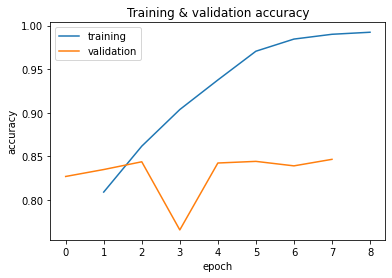

In [17]:
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs,history.history['accuracy'],history.history['val_accuracy'])
plt.title('Training & validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training','validation'])
plt.show()

# Now, let's save the model since we've take a lot of time to train the model.

In [18]:
model.save("my_model")

2021-11-24 23:17:31.032053: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: my_model/assets


<h3> If you want to load your model you can call it with this code

In [19]:
reconstructed_model = load_model("my_model")